In [70]:
import pandas as pd
import seaborn as sb
import numpy as np
from pathlib import Path

In [97]:
PATH = Path('../WorkshopExperiments/data/')
FILENAMES = {'compatibility': 'compat_s1.csv',
             'item_data': 'items_s1.csv',
             'recs': 'recs_test.csv'}

In [98]:
compat_df = pd.read_csv(PATH / FILENAMES['compatibility'], names=['User', 'Feature', 'Compatibility'])
item_df = pd.read_csv(PATH / FILENAMES['item_data'], names=['Item', 'Feature', 'Value'])
recs_df = pd.read_csv(PATH / FILENAMES['recs'], names=['User', 'Item', 'Rating'])

In [99]:
recs_df.head()

,User,Item,Rating
0,0,467,15.714496
1,0,235,12.262069
2,0,34,11.825097
3,0,377,11.529263
4,0,204,9.819445


In [100]:
recs_df.groupby('User').count()

,Item,Rating
User,,
0,50,50
1,50,50
2,50,50
3,50,50
4,50,50
...,...,...
1495,50,50
1496,50,50
1497,50,50


In [101]:
item_df.head()

,Item,Feature,Value
0,0,0,0
1,0,1,0
2,0,2,1
3,0,3,1
4,0,4,1


In [102]:
compat_df.head()

,User,Feature,Compatibility
0,0,0,0.159787
1,0,1,0.969814
2,0,2,0.239622
3,0,3,0.288448
4,0,4,0.218734


<AxesSubplot:xlabel='User', ylabel='Compatibility'>

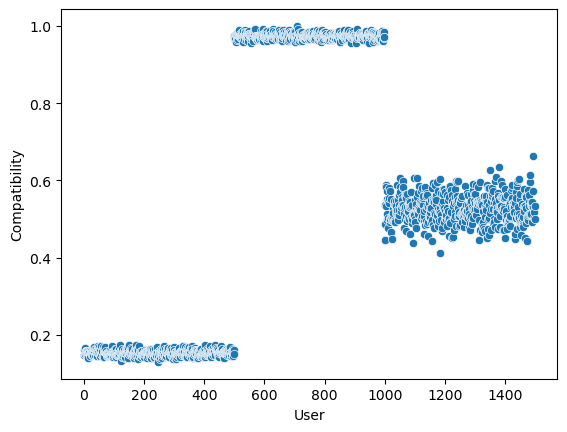

In [103]:
sb.scatterplot(x='User', y='Compatibility', data=compat_df[compat_df['Feature']==0])

<AxesSubplot:xlabel='User', ylabel='Compatibility'>

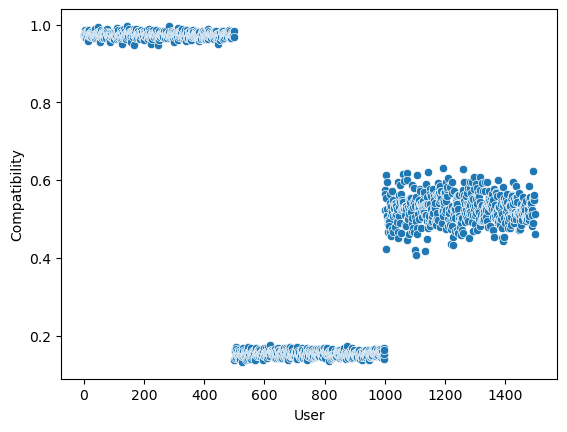

In [104]:
sb.scatterplot(x='User', y='Compatibility', data=compat_df[compat_df['Feature']==1])

<AxesSubplot:xlabel='Feature', ylabel='Compatibility'>

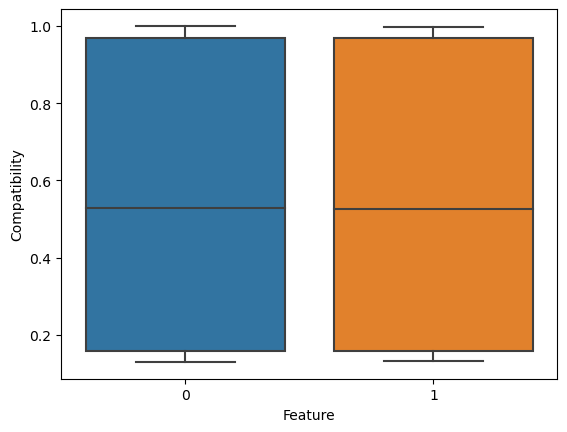

In [105]:
sb.boxplot(x='Feature', y='Compatibility', data=compat_df[(compat_df['Feature']==1) | (compat_df['Feature']==0)])

In [106]:
user0_df = recs_df[recs_df['User']==0]

In [107]:
user0_df.head()

,User,Item,Rating
0,0,467,15.714496
1,0,235,12.262069
2,0,34,11.825097
3,0,377,11.529263
4,0,204,9.819445


In [108]:
user9_df = recs_df[recs_df['User']==9]

In [109]:
user9_df.head()

,User,Item,Rating
450,9,868,11.673081
451,9,282,11.437185
452,9,980,9.761722
453,9,610,9.596426
454,9,157,8.779002


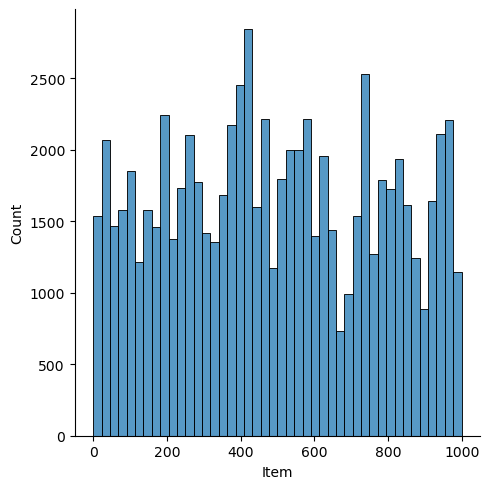

In [110]:
sb.displot(data=recs_df, x='Item')

In [111]:
user0_df[0:10]

,User,Item,Rating
0,0,467,15.714496
1,0,235,12.262069
2,0,34,11.825097
3,0,377,11.529263
4,0,204,9.819445
5,0,448,9.419459
6,0,948,8.607814
7,0,100,8.154417
8,0,634,7.920626
9,0,139,7.885456


In [112]:
user9_df[0:10]

,User,Item,Rating
450,9,868,11.673081
451,9,282,11.437185
452,9,980,9.761722
453,9,610,9.596426
454,9,157,8.779002
455,9,241,7.841640
456,9,572,7.823980
457,9,724,7.741156
458,9,747,7.373995
459,9,195,7.131834


In [113]:
feature_lookup = item_df.pivot(*item_df)
feature_lookup.head()

Feature,0,1,2,3,4,5,6,7,8,9
Item,,,,,,,,,,
0,0,0,1,1,1,1,1,1,0,0
1,0,0,1,1,1,0,0,1,1,0
2,0,0,1,1,1,0,0,0,0,0
3,0,0,1,1,0,0,1,1,1,0
4,0,0,1,0,1,1,1,1,0,0


In [114]:
recs_wide = recs_df.merge(feature_lookup, on='Item', how='inner')

In [115]:
recs_wide.head()

,User,Item,Rating,0,1,2,3,4,5,6,7,8,9
0,0,467,15.714496,0,0,1,1,1,0,0,1,0,0
1,2,467,14.577049,0,0,1,1,1,0,0,1,0,0
2,4,467,15.407534,0,0,1,1,1,0,0,1,0,0
3,6,467,14.906535,0,0,1,1,1,0,0,1,0,0
4,10,467,17.688890,0,0,1,1,1,0,0,1,0,0


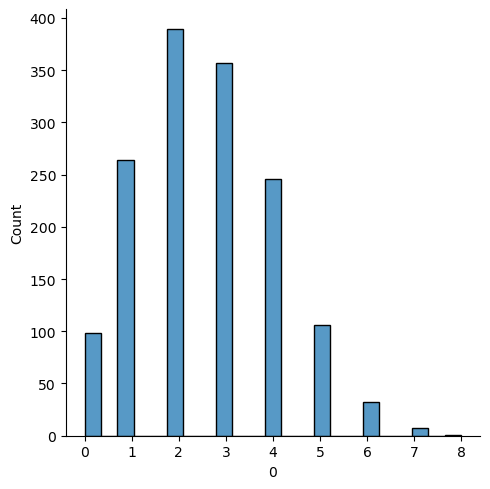

In [116]:
sb.displot(recs_wide.groupby('User')[0].sum())

In [117]:
def is_protected(item, feature):
    return feature_lookup.loc[item, int(feature)]==1
    
def rank_of_protected_item (rec_list, feature):
    for i, item in enumerate(rec_list):
        if is_protected(item, feature):
            return i
    return np.nan
        
def collect_rec_list(user):
    user_df = recs_df[recs_df['User']==user]
    return list(user_df['Item'])

In [118]:
df_dict = {}
for feature in ["0", "1"]:
    df_dict[feature] = []
    for user in recs_df['User'].unique():
        user_list = collect_rec_list(user)
        df_dict[feature].append(rank_of_protected_item(user_list, feature))
first_occ = pd.DataFrame(df_dict)

first_melt = first_occ.melt(value_vars=['0', '1'])
first_melt.head()

,variable,value
0,0,8.0
1,0,25.0
2,0,10.0
3,0,14.0
4,0,35.0


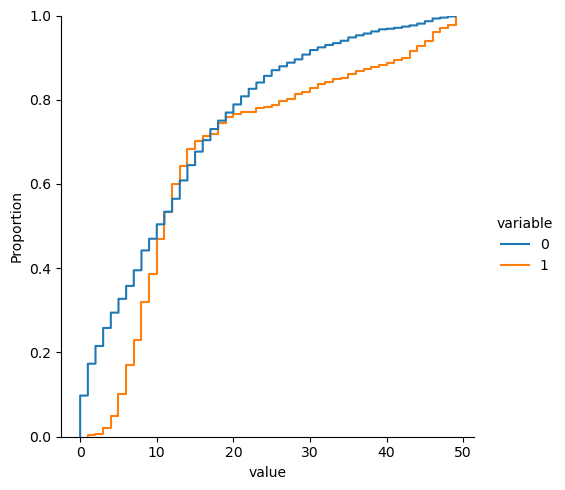

In [119]:
sb.displot(data=first_melt, x='value', hue='variable', kind='ecdf')